# WeatherPy



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# Import API key
import api_keys
import pyowm
import os
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Import datetime
import datetime
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Add api key from file
owm = pyowm.OWM(api_keys.api_key) 

In [3]:
owm = pyowm.OWM("128b3cceed6f5b13e7b5c03be1c3e87d") 

## Generate Cities List

In [4]:
# List for holding lats_longs and cities
lats_longs = []
cities = []
# To store city lats
final_lats = []
final_lngs = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lats_longs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lats_longs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        final_lats.append(lat_lng[0])
        final_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

859

In [5]:
city_df = pd.DataFrame(cities)
city_df.to_csv("city data.csv")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
weather_data = {}
# Loop over each city
print("Started Api Call")

for i in range(len(cities)):
    try:
        print("Getting Data of city no: "+str(i+1) +" city: " +cities[i])
        observation = owm.weather_at_coords(lat=float(final_lats[i]) , lon= float(final_lngs[i]) )
        w = observation.get_weather()            
        # Weather details
        temperature = w.get_temperature('fahrenheit')['temp']
        humidity = w.get_humidity()
        clouds = w.get_clouds()
        wind_speed = w.get_wind()['speed']
        city_data = {'city':cities[i],'temperature':temperature,'humidity':humidity, 'clouds':clouds, 'wind_speed':wind_speed,
                    'lat':final_lats[i],'lon':final_lngs[i]}
        weather_data[i] = city_data
    except:
        print("City Data Not Found")
print("Finished API Call")

Started Api Call
Getting Data of city no: 1 city: punta arenas
Getting Data of city no: 2 city: busselton
Getting Data of city no: 3 city: kapaa
Getting Data of city no: 4 city: baturaja
Getting Data of city no: 5 city: jieznas
Getting Data of city no: 6 city: arraial do cabo
Getting Data of city no: 7 city: dikson
Getting Data of city no: 8 city: new norfolk
Getting Data of city no: 9 city: albany
Getting Data of city no: 10 city: severo-kurilsk
Getting Data of city no: 11 city: rikitea
Getting Data of city no: 12 city: cherskiy
Getting Data of city no: 13 city: jadu
Getting Data of city no: 14 city: bredasdorp
Getting Data of city no: 15 city: hobart
Getting Data of city no: 16 city: olafsvik
Getting Data of city no: 17 city: klaksvik
Getting Data of city no: 18 city: fethiye
Getting Data of city no: 19 city: te anau
Getting Data of city no: 20 city: honningsvag
Getting Data of city no: 21 city: victoria
Getting Data of city no: 22 city: skjervoy
Getting Data of city no: 23 city: luc

Getting Data of city no: 187 city: loiza
Getting Data of city no: 188 city: baturinskaya
Getting Data of city no: 189 city: ronneby
Getting Data of city no: 190 city: vila velha
Getting Data of city no: 191 city: tsihombe
Getting Data of city no: 192 city: vaitupu
Getting Data of city no: 193 city: mandalgovi
Getting Data of city no: 194 city: abu dhabi
Getting Data of city no: 195 city: pacific grove
Getting Data of city no: 196 city: ugoofaaru
Getting Data of city no: 197 city: vanavara
Getting Data of city no: 198 city: bridlington
Getting Data of city no: 199 city: boende
Getting Data of city no: 200 city: meulaboh
Getting Data of city no: 201 city: the valley
Getting Data of city no: 202 city: bambous virieux
Getting Data of city no: 203 city: nabire
Getting Data of city no: 204 city: adrar
Getting Data of city no: 205 city: grand river south east
Getting Data of city no: 206 city: ambilobe
Getting Data of city no: 207 city: sentyabrskiy
Getting Data of city no: 208 city: celestun

Getting Data of city no: 371 city: makung
Getting Data of city no: 372 city: mino
Getting Data of city no: 373 city: verkhnevilyuysk
Getting Data of city no: 374 city: dalbandin
Getting Data of city no: 375 city: bur gabo
Getting Data of city no: 376 city: sola
Getting Data of city no: 377 city: sur
Getting Data of city no: 378 city: pingliang
Getting Data of city no: 379 city: porto torres
Getting Data of city no: 380 city: baherden
Getting Data of city no: 381 city: morristown
Getting Data of city no: 382 city: preobrazheniye
Getting Data of city no: 383 city: bunia
Getting Data of city no: 384 city: matai
Getting Data of city no: 385 city: plettenberg bay
Getting Data of city no: 386 city: haimen
Getting Data of city no: 387 city: khorixas
Getting Data of city no: 388 city: raga
Getting Data of city no: 389 city: nanortalik
Getting Data of city no: 390 city: chauk
Getting Data of city no: 391 city: constitucion
Getting Data of city no: 392 city: ilhabela
Getting Data of city no: 393

Getting Data of city no: 557 city: pecos
Getting Data of city no: 558 city: lusambo
Getting Data of city no: 559 city: matara
Getting Data of city no: 560 city: halalo
Getting Data of city no: 561 city: sulphur springs
Getting Data of city no: 562 city: beira
Getting Data of city no: 563 city: grindavik
Getting Data of city no: 564 city: elizabeth city
Getting Data of city no: 565 city: aflu
Getting Data of city no: 566 city: suoyarvi
Getting Data of city no: 567 city: mayskiy
Getting Data of city no: 568 city: almaznyy
Getting Data of city no: 569 city: richards bay
Getting Data of city no: 570 city: baghdad
Getting Data of city no: 571 city: solnechnyy
Getting Data of city no: 572 city: itarema
Getting Data of city no: 573 city: yeppoon
Getting Data of city no: 574 city: tazovskiy
Getting Data of city no: 575 city: half moon bay
Getting Data of city no: 576 city: cururupu
Getting Data of city no: 577 city: marcona
Getting Data of city no: 578 city: port blair
Getting Data of city no:

Getting Data of city no: 743 city: aswan
Getting Data of city no: 744 city: verkhnyaya inta
Getting Data of city no: 745 city: saint joseph
Getting Data of city no: 746 city: bowen
Getting Data of city no: 747 city: umtata
Getting Data of city no: 748 city: kadykchan
Getting Data of city no: 749 city: malakal
Getting Data of city no: 750 city: malwan
Getting Data of city no: 751 city: george
Getting Data of city no: 752 city: iacu
Getting Data of city no: 753 city: chaochou
Getting Data of city no: 754 city: the pas
Getting Data of city no: 755 city: stuttgart
Getting Data of city no: 756 city: daye
Getting Data of city no: 757 city: ryomgard
Getting Data of city no: 758 city: raudeberg
Getting Data of city no: 759 city: bubaque
Getting Data of city no: 760 city: kolondieba
Getting Data of city no: 761 city: gamba
Getting Data of city no: 762 city: san nicolas
Getting Data of city no: 763 city: ledyard
Getting Data of city no: 764 city: pawayan
Getting Data of city no: 765 city: tambul

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
data_frame = pd.DataFrame.from_dict(weather_data, orient= 'index')

In [24]:
# create the ouptut and write to file
outdir = output_data_file.split("/")[0]
if not os.path.exists(outdir):
    os.mkdir(outdir)
data_frame.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [26]:
%matplotlib inline
current_date = str(datetime.datetime.now())
date = current_date.split(" ")[0]

#### Latitude vs. Temperature Plot

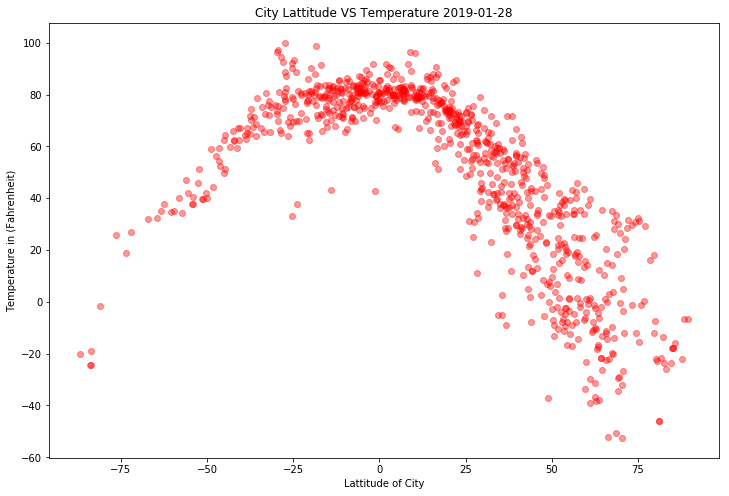

In [31]:
fig = plt.figure(figsize=(12,8))
plt.scatter(data_frame.lat,data_frame.temperature,  alpha=0.4, color = "red" )
plt.title("City Lattitude VS Temperature "+date)
plt.xlabel("Lattitude of City")
plt.ylabel("Temperature in (Fahrenheit)")
plt.savefig("Latitude vs Temperature Plot City.png")
plt.show()

#### Latitude vs. Humidity Plot

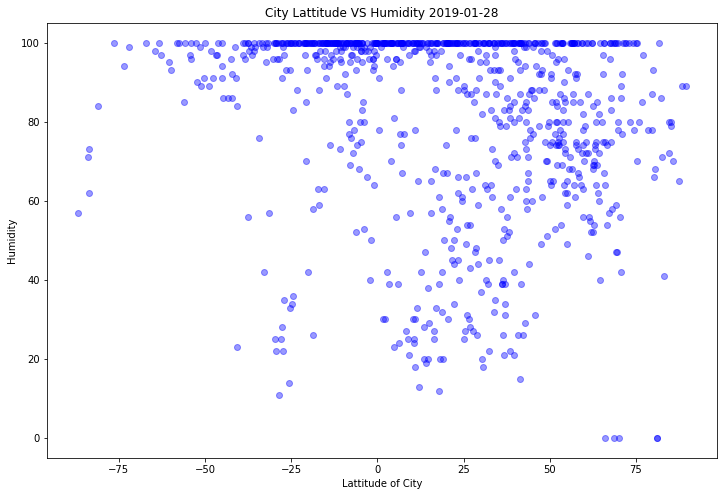

In [32]:
fig = plt.figure(figsize=(12,8))
plt.scatter(data_frame.lat,data_frame.humidity,  alpha=0.4, color = "blue" )
plt.title("City Lattitude VS Humidity "+date)
plt.xlabel("Lattitude of City")
plt.ylabel("Humidity")
plt.savefig("Latitude vs Humidity Plot city.png")
plt.show()


#### Latitude vs. Cloudiness Plot

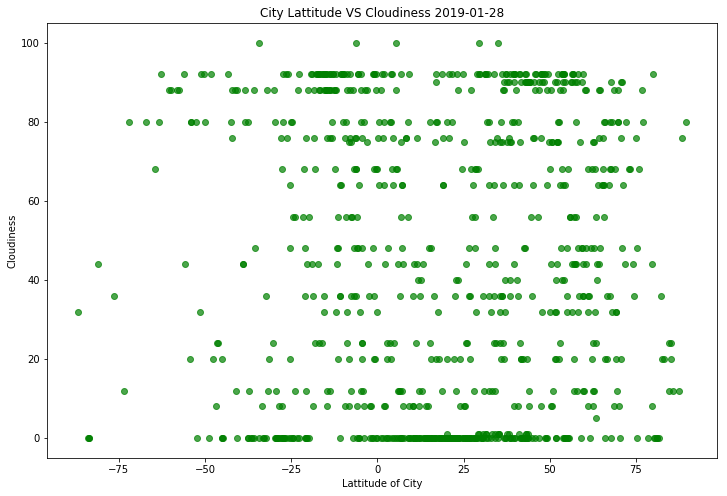

In [33]:
fig = plt.figure(figsize=(12,8))
plt.scatter(data_frame.lat,data_frame.clouds,  alpha=0.7 , color = "green")
plt.title("City Lattitude VS Cloudiness "+date)
plt.xlabel("Lattitude of City")
plt.ylabel("Cloudiness")
plt.savefig("Latitude vs Cloudiness Plot city.png")
plt.show()


#### Latitude vs. Wind Speed Plot

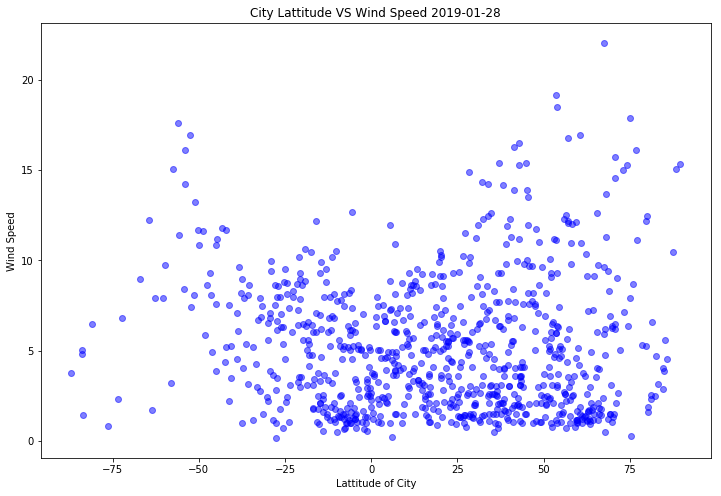

In [34]:
fig = plt.figure(figsize=(12,8))
plt.scatter(data_frame.lat,data_frame.wind_speed,  alpha=0.5, color = "blue" )
plt.title("City Lattitude VS Wind Speed "+date)
plt.xlabel("Lattitude of City")
plt.ylabel("Wind Speed")
plt.savefig("Latitude vs. Wind Speed City.png")
plt.show()

# Written description of three observable trends based on the data.


* There is a strong relationship between latitude and temperature of city. Near to the equator the temperature is warmer . As we go further than latitude the temperature decreases.
*  Latitude of city and humidity is completely not strongly related.
*  Cloudiness and lattitude is also completely random and not strongly related. For any lattitude Cloudiness of a city varies between high and low.
* Windspeed and lattitude of city are realated somehow on a small fraction. For furhtest to the equator we can see few cities wind speed is the hightest and closest to the  equator lower than other city. 